# Task 1: Exploratory Data Analysis (EDA)

Q1. Perform exploratory data analysis to understand the structure of the dataset.

Q2. Check for missing values, outliers, inconsistencies in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_excel('glass.xlsx',sheet_name='glass')

# Display the first few rows and check for any obvious issues
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


##### Basic Data Exploration

In [2]:
# Get summary statistics
print("\nSummary statistics:")
df.describe()


Summary statistics:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [3]:
# Get number of rows and columns

print("\nNumber of rows and columns:")
df.shape


Number of rows and columns:


(214, 10)

In [4]:
# Get column names

print("\nColumn names:")
df.columns


Column names:


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
# Get data types of columns

print("\nData types of columns:")
df.dtypes


Data types of columns:


RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

##### Missing Values

In [6]:
# Check for any missing values

print("\nMissing values:")
print(df.isnull().sum())


Missing values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


##### Outliers

In [7]:
# Check for outliers using z-score

# Calculate Z-scores for all numeric columns
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Define threshold for identifying outliers
threshold = 3

# Find rows with outliers
outlier_rows = (abs(z_scores) > threshold).any(axis=1)

# Print rows containing outliers
print("Rows with outliers:")
df[outlier_rows]

Rows with outliers:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
162,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5


In [8]:
# Clean the dataset and remove outliers
df = df[~outlier_rows]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


##### Handling inconsistencies in data

In [9]:
# Removing duplicate rows

df.drop_duplicates(inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


# Task 2: Data Visualization

Q1. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Q2. Analyze any patterns or correlations observed in the data.

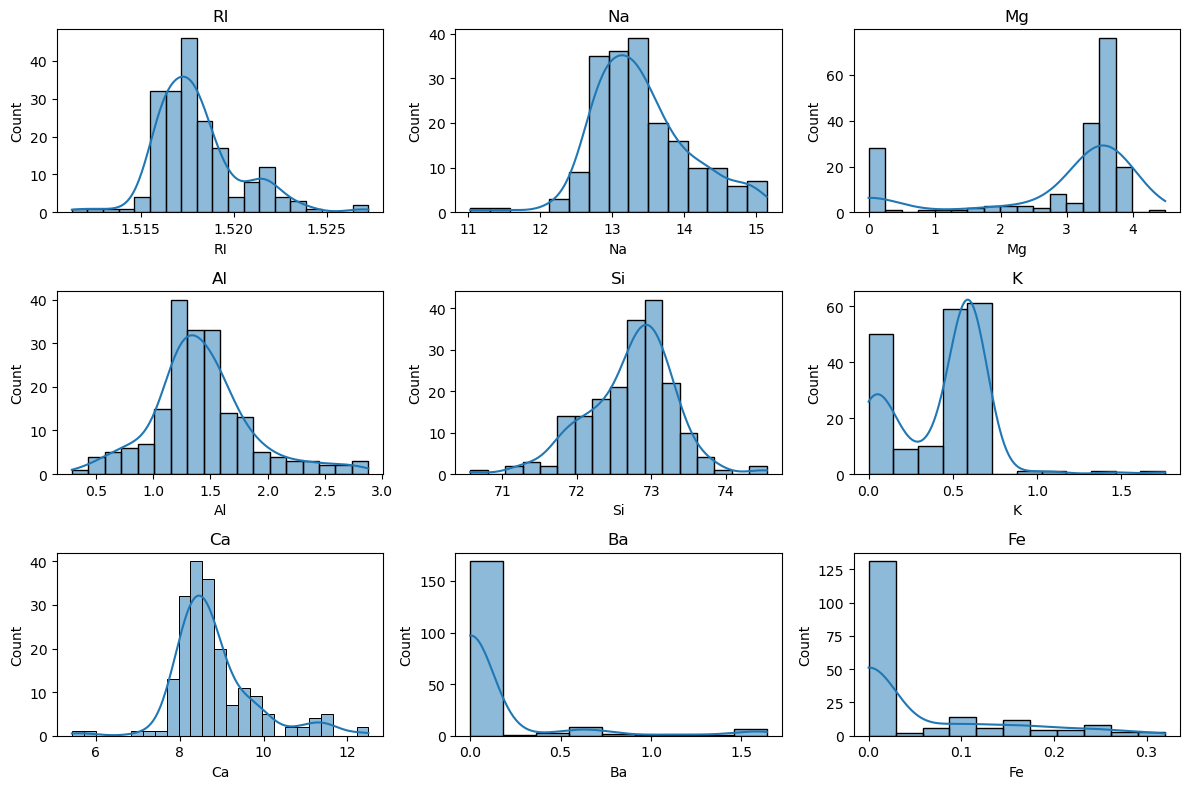

In [10]:
# Visualize the distribution of numerical features

plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    if column != 'Type':  # Exclude the target variable 'Type'
        plt.subplot(3, 3, i + 1)
        sns.histplot(df[column], kde=True)
        plt.title(column)
plt.tight_layout()
plt.show()

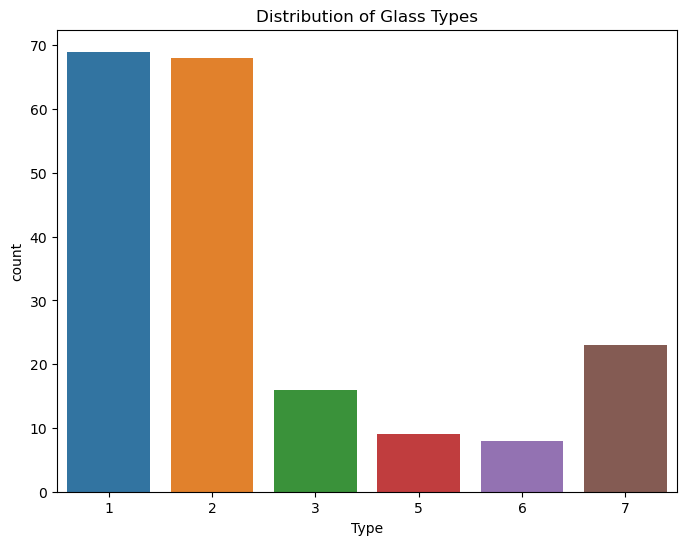

In [11]:
# Visualize categorical feature (Type)

plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Glass Types')
plt.show()

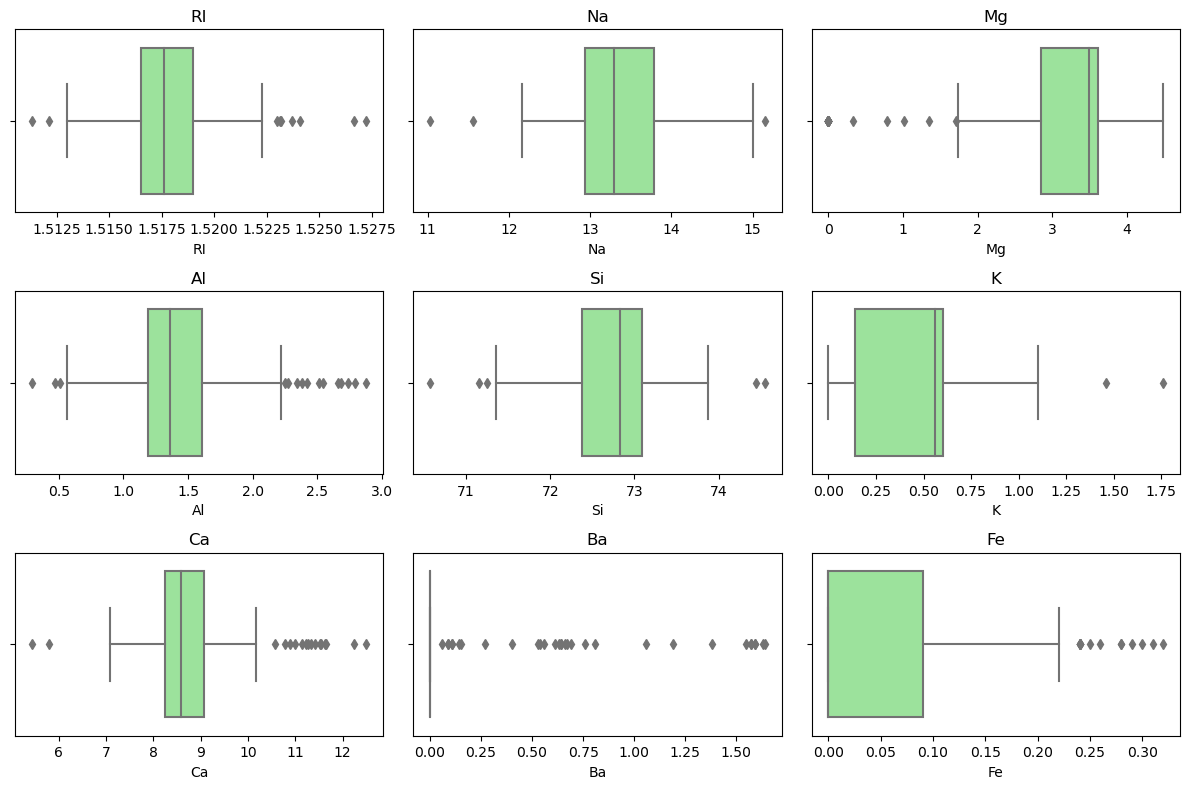

In [12]:
# Box plots of numerical features

numerical_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(column)
plt.tight_layout()
plt.show()

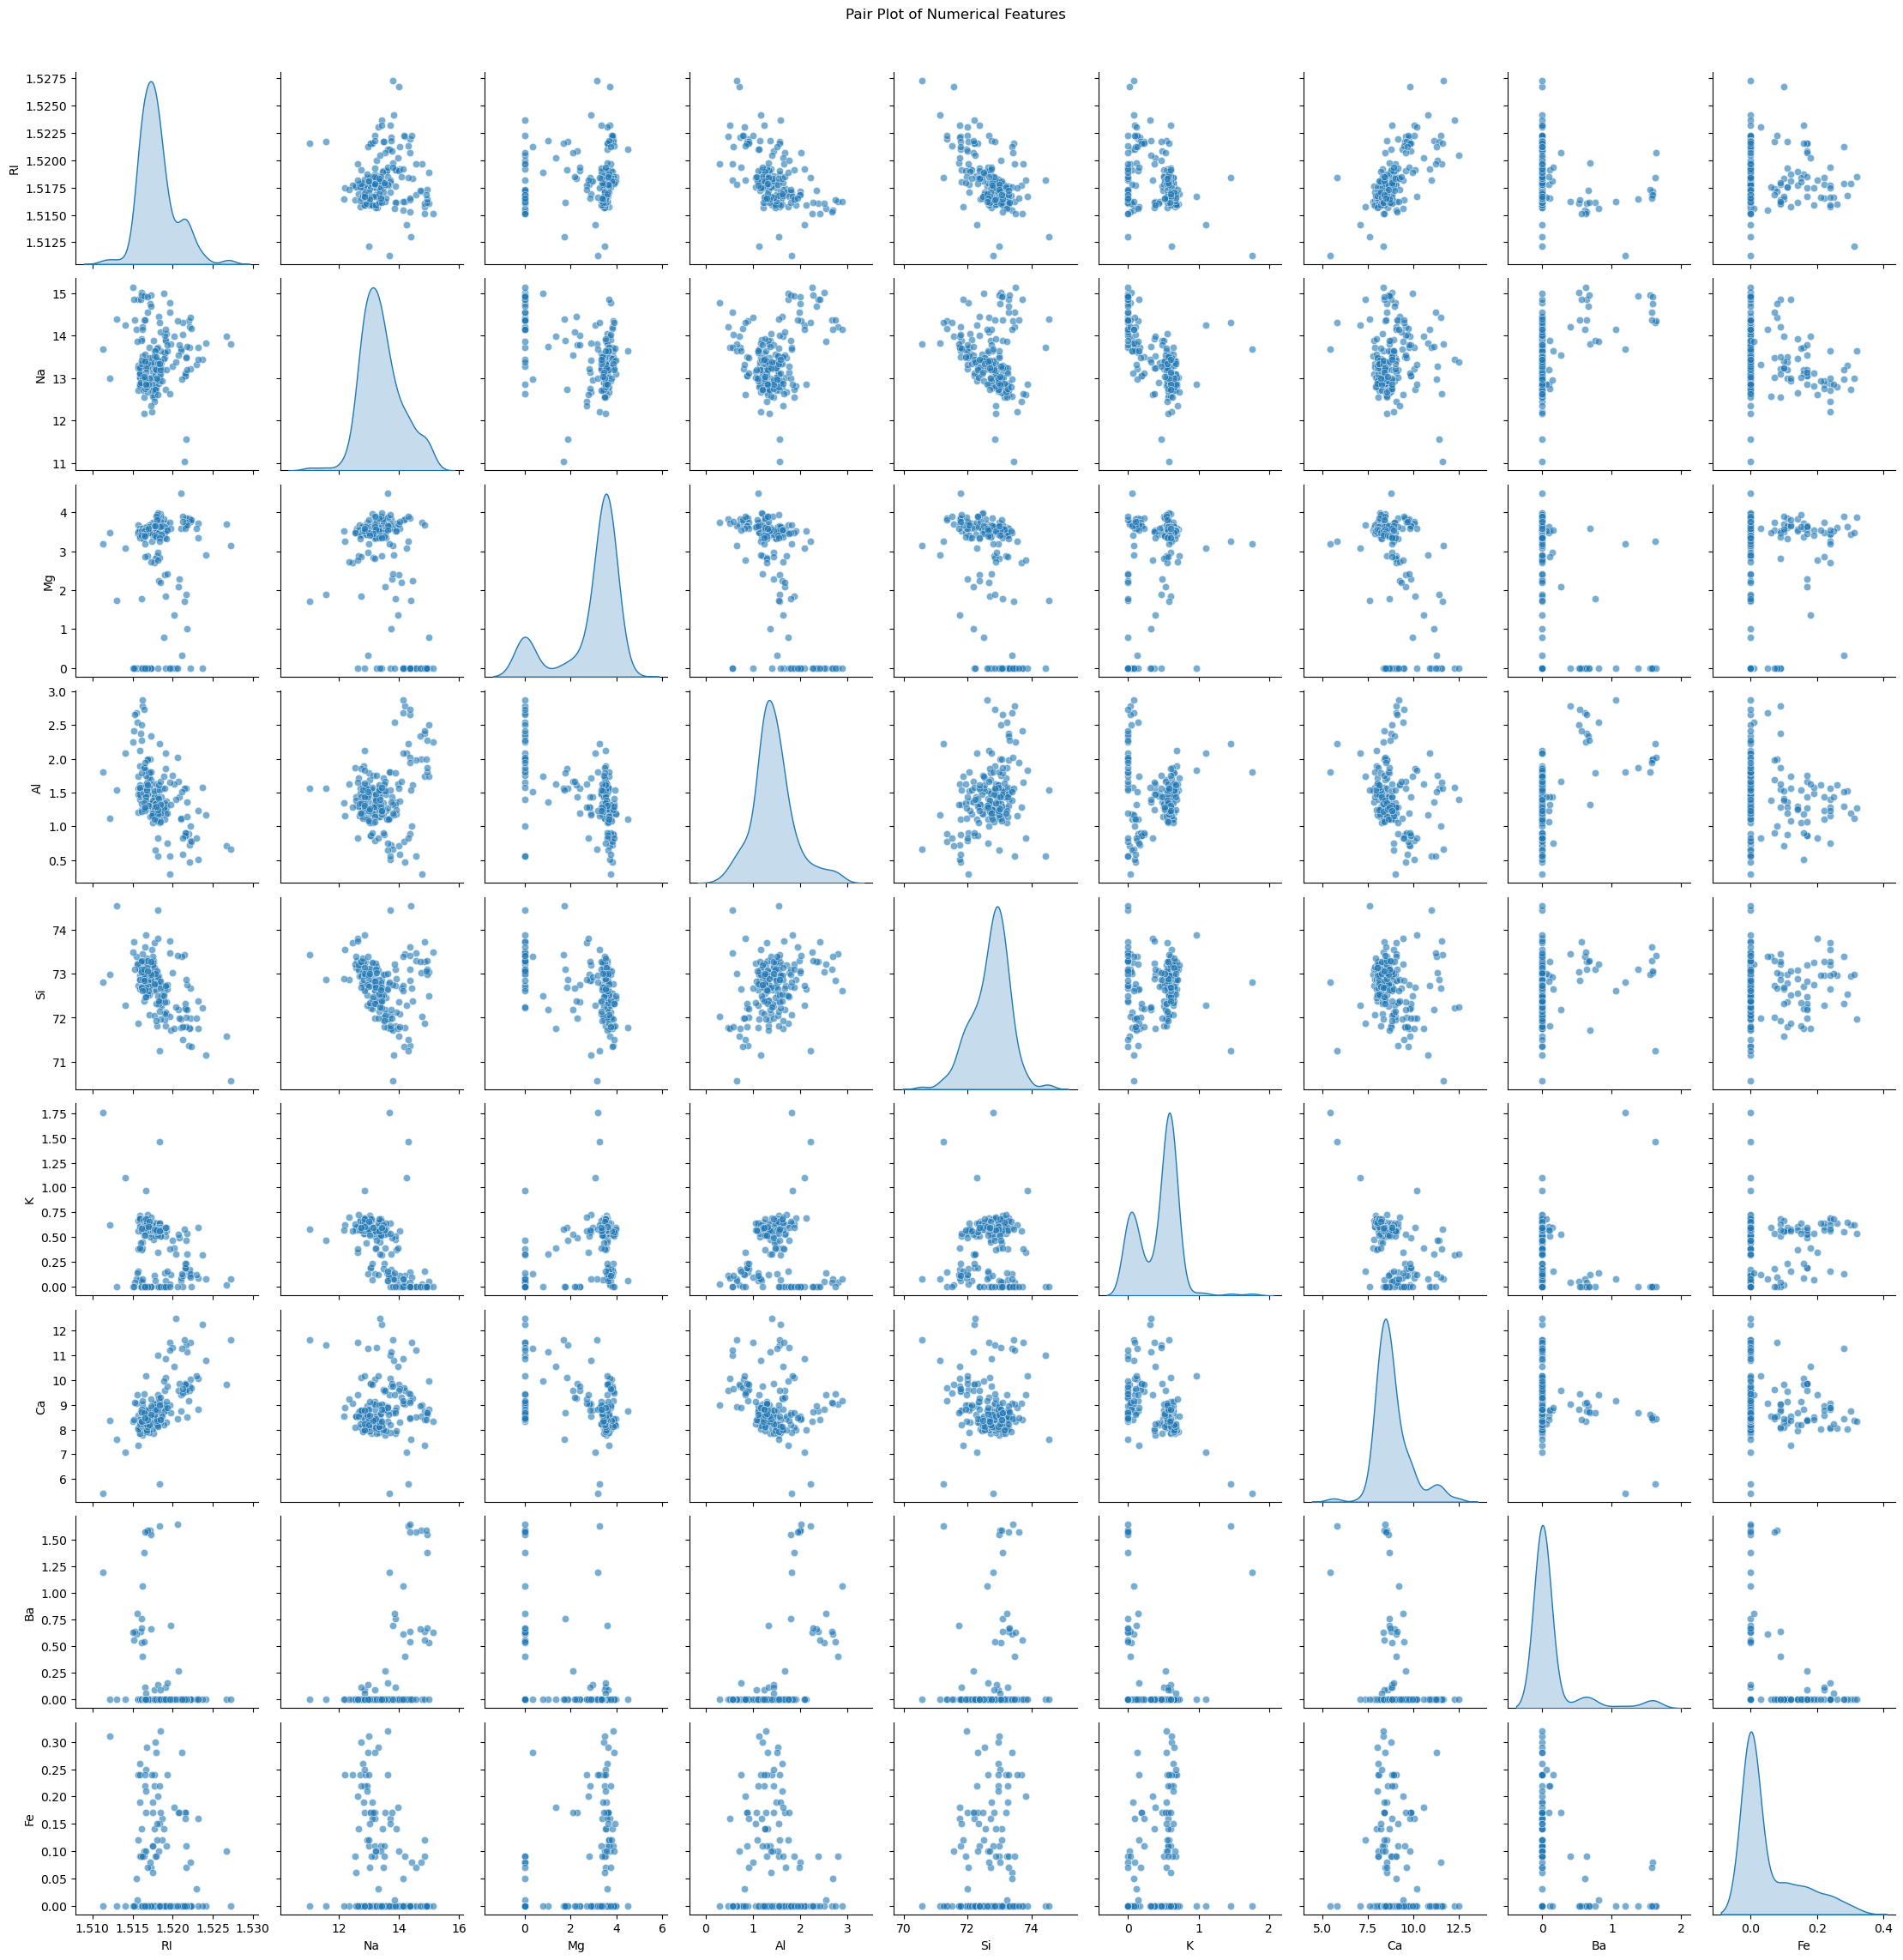

In [13]:
# Pair plot of numerical features
sns.pairplot(df[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

#### Patterns and Correlations Analysis:

1. Refractive Index (RI):
    1. Distribution: The distribution appears approximately normal with a peak around 1.52.
    2. Correlation: RI doesn't show strong correlations with other numerical features based on the pair plot.
2. Chemical Composition (Na, Mg, Al, Si, K, Ca, Ba, Fe) Distributions:
    1. Na: Appears slightly positively skewed with a range mainly between 11.5 to 16.
    2. Mg: Concentrated around lower values with a few outliers.
    3. Al: Shows a right-skewed distribution with a range from 1 to 4, with a peak around 1.5 to 2.
    4. Si: Appears to be normally distributed with a range from 70 to 75.
    5. K: Concentrated around lower values with outliers on the higher end.
    6. Ca: Concentrated around lower values with a few outliers on the higher end.
    7. Ba: Majority of values are zero, with a few outliers.
    8. Fe: Mostly concentrated at lower values with a few higher outliers.
3. Correlations:
    1. Positive Correlations:
        1. There is a noticeable positive correlation between Ba and Fe, indicating that higher values of Ba are often associated with higher values of Fe.
        2. Ca also shows some positive correlation with Al and Si.
    2. Negative Correlations: There doesn't appear to be strong negative correlations among the numerical features based on the pair plot.
    
##### Insights:

1. Composition Variability: The elements Na, Mg, Al, Si, K, Ca, Ba, and Fe exhibit varying degrees of variability in their distributions.
2. Outliers: Several features, such as Mg, K, Ca, Ba, and Fe, have outliers that could potentially affect model performance if not handled appropriately during preprocessing.
3. Potential Feature Importance: Features like Al, Ba, and Fe might have significant importance in distinguishing between different types of glass due to their distinct distributions and correlations.

# Task 3: Data Preprocessing

Q1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

Q2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

Q3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


From the output, we observe that there are no missing values in any columns.

In [15]:
# Check unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in RI: [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52222 1.51818 1.51892 1.51847
 1.51846 1.51829 1.51708 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707
 1.52177 1.51872 1.51667 1.52081 1.52068 1.5202  1.51813 1.518   1.51789
 1.51806 1.51711 1.51674 1.5169  1.51851 1.51662 1.51709 1.5166  1.5161
 1.5167  1.51643 1.51665 1.5212

From the output, we observe that all columns (Id, RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type) contain numerical values. There are no categorical variables that require encoding such as one-hot encoding in this dataset. Therefore, we can proceed with further analysis and modeling without the need for additional encoding steps.

# Task 4: Random Forest Model Implementation

Q1. Divide the data into train and test split.

Q2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

Q3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [16]:
# Split data into training and testing sets

# Separate features (X) and target variable (y)
X = df.drop(columns=['Type'])
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize numerical columns

numerical_cols=df.select_dtypes(include=np.number).columns.tolist()
numerical_cols=numerical_cols[:-1] # Excluding the 'Type' column

# Apply standardization to numerical columns
scaler = StandardScaler()
# Fit and transform on training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [18]:
# Check class distribution to identify imbalance (if any)
class_distribution = y_train.value_counts()
print("Class Distribution:\n", class_distribution)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42, k_neighbors=4)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
smote

Class Distribution:
 Type
2    56
1    55
7    22
3    10
6     6
5     5
Name: count, dtype: int64


SMOTE(k_neighbors=4, random_state=42)

In [19]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [20]:
# Train the classifier
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [21]:
# Make Predictions and Evaluate the Model

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.77
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.92      0.92      0.92        12
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.77        39
   macro avg       0.76      0.80      0.77        39
weighted avg       0.69      0.77      0.72        39



In [22]:
# Calculate precision, recall, F1-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {fscore:.4f}')

# Generate classification report
print(classification_report(y_test, y_pred))

Precision: 0.6883
Recall: 0.7692
F1-score: 0.7226
              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.92      0.92      0.92        12
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.77        39
   macro avg       0.76      0.80      0.77        39
weighted avg       0.69      0.77      0.72        39



# Task 5: Bagging and Boosting Methods

Q1. Apply the Bagging and Boosting methods and compare the results.

#### Additional Notes:
Q1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging and Boosting are both ensemble learning techniques that aim to improve the performance of machine learning models by combining multiple base models. However, they differ in their approach and how they aggregate predictions from individual models.

###### Bagging (Bootstrap Aggregating)
Bagging stands for Bootstrap Aggregating. The steps are:

1. Bootstrap Sampling: Bagging involves creating multiple bootstrap samples (random samples with replacement) from the original dataset. Each bootstrap sample is of the same size as the original dataset.
2. Parallel Training: On each bootstrap sample, a base model (e.g., Decision Tree) is trained independently. This results in multiple models that have been trained on different subsets of the data.
3. Aggregate Predictions: To make predictions, Bagging typically aggregates the predictions from all base models. For regression tasks, this might involve averaging the predictions, while for classification tasks, it often involves taking the majority vote (or averaging probabilities) from all models.

##### Boosting
Boosting is another ensemble technique, which works in the below way:

1. Sequential Training: Boosting involves sequentially training multiple models. Each subsequent model is trained to correct the errors made by the previous model(s). Therefore, each model in the sequence focuses more on instances that were misclassified previously.
2. Instance Weighting: Boosting assigns weights to each instance in the dataset. Initially, all weights are equal, but as models are trained sequentially, weights are adjusted based on the model's performance on each instance. Misclassified instances receive higher weights, making them more likely to be included in subsequent training iterations.
3. Aggregate Predictions: Similar to Bagging, Boosting also aggregates predictions from multiple models. However, in Boosting, models are typically weighted based on their performance (e.g., accuracy). Models that perform better on the training data have more influence on the final prediction.

##### Key Differences

1. Training Process: Bagging trains each base model independently and in parallel, whereas Boosting trains models sequentially where each subsequent model focuses on improving the performance of the ensemble.
2. Instance Weighting: Boosting assigns weights to instances and adjusts them over training iterations to prioritize difficult instances. Bagging treats all instances equally due to the independent sampling.
3. Aggregation: Bagging typically uses averaging or voting to combine predictions from multiple models. Boosting uses weighted averaging where models with higher performance have more influence.
4. Complexity: Boosting tends to be more complex and computationally intensive than Bagging due to its sequential nature and instance weighting.

Q2. Explain how to handle imbalance in the data.

Handling imbalance in the data is a critical step in machine learning, especially when the classes in the dataset are unevenly distributed. Imbalanced data can lead to biased models that favor the majority class, resulting in poor predictive performance for the minority class. Here are several effective strategies to handle imbalance in the data:

##### Resampling Techniques

1. Oversampling
    1. Random Oversampling: Randomly duplicate examples in the minority class to increase its representation.
    2. SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic examples for the minority class based on nearest neighbors, rather than simply duplicating them. This method helps to avoid overfitting and can generate more diverse synthetic samples.
2. Undersampling
    1. Random Undersampling: Randomly removes examples from the majority class to reduce its dominance. This can lead to loss of information, so it should be done carefully.
    2. Cluster Centroids: Uses clustering techniques to identify centroids of clusters formed by majority class examples and then undersamples majority class examples around these centroids.
3. Combined Sampling
    1. SMOTE-ENN (SMOTE + Edited Nearest Neighbors): Combines oversampling of the minority class with undersampling of the majority class.

##### Algorithmic Techniques

1. Cost-sensitive Learning: Assign different costs to different classes during model training. This encourages the model to pay more attention to minority class examples.
2. Resampling Inside Cross-Validation: Perform resampling techniques inside each fold of cross-validation to avoid data leakage and better evaluate model performance.


##### Algorithm Selection
1. Ensemble Methods: Algorithms like Random Forest, Gradient Boosting Machines (GBM), and AdaBoost tend to handle class imbalance better because they can learn from misclassified instances and prioritize difficult examples.
2. Algorithm-specific Techniques: Some algorithms have built-in mechanisms to handle class imbalance. For example, class_weight parameter in sklearn's classifiers or scale_pos_weight in XGBoost can be set to automatically adjust for class imbalance.

##### Evaluation Metrics

1. Use appropriate metrics: Accuracy may not be suitable for imbalanced datasets. Instead, metrics such as Precision, Recall, F1-score, and Area Under the ROC Curve (AUC-ROC) are more informative.
2. Confusion Matrix: Analyzing the confusion matrix can provide insights into how well the model performs across different classes, especially the minority class.

##### Data-level Techniques

1. Feature Engineering: Create new features that highlight differences between classes or combine features to make patterns more apparent.
2. Anomaly Detection: Treat the minority class as an anomaly detection problem if the goal is to detect rare events.

In [24]:
# Bagging: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Evaluate Random Forest metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')


print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")


# Boosting: Gradient Boosting 
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train_resampled, y_train_resampled) # Train the model
y_pred_gbc = gbc.predict(X_test) # Predict on the test set

# Evaluate accuracy
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)

# Evaluate precision, recall, and F1-score
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted')
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {accuracy_gbc:.4f}")
print(f"Precision: {precision_gbc:.4f}")
print(f"Recall: {recall_gbc:.4f}")
print(f"F1-score: {f1_gbc:.4f}")

Random Forest Accuracy: 0.7692
Random Forest Metrics:
Accuracy: 0.7692
Precision: 0.6883
Recall: 0.7692
F1-score: 0.7226

Gradient Boosting Metrics:
Accuracy: 0.6410
Precision: 0.6974
Recall: 0.6410
F1-score: 0.6113


#### Result Comparison:

1. Accuracy: Random Forest (0.7692) outperformed Gradient Boosting (0.6410) in terms of overall accuracy on the test set.
2. Precision: Random Forest (0.6883) had slightly lower precision compared to Gradient Boosting (0.6974), indicating that Gradient Boosting had fewer false positives.
3. Recall: Random Forest (0.7692) had higher recall compared to Gradient Boosting (0.6410), suggesting Random Forest identified more true positives relative to the total actual positives.
4. F1-score: Random Forest (0.7226) had a higher F1-score compared to Gradient Boosting (0.6113), which balances precision and recall. This suggests Random Forest achieved a better balance between precision and recall.